In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Pandas settings to avoid exponential form and display all columns ###
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

In [107]:
### Read the cleaned up csv derived after data cleaning ###
df = pd.read_csv("whisky_df_clean.csv")

In [108]:
df.head()

,name,type,price,expert_score,user_rating,description,abv,style,cask,review,smoky,peaty,spicy,herbal,oily,full-bodied,rich,sweet,briny,salty,vanilla,tart,fruity,floral,country
0,Hibiki 21 Year,Blended,5,99,4.52,Hibiki is the blended whisky brand produced by...,43.00,Comprised of both single malt(s) and single gr...,"ex-bourbon American oak, ex-sherry European oa...","""Tasting this whisky was one of those moments ...",30,30,50,30,20,80,80,85,0,15,20,25,85,50,4
1,Highland Park 18 Year,Peated Single Malt,4,99,4.49,Shudder to think that Highland Park 18 has onl...,43.00,100% malted barley from a single distillery. D...,ex-sherry,"""The sweet smoke is the underlying feature in ...",40,40,40,20,40,70,80,70,20,40,50,50,70,20,0
2,George T. Stagg Bourbon (Fall 2019),Bourbon,4,98,4.59,George T. Stagg Bourbon (Fall 2019) is an uncu...,58.45,Produced anywhere in USA; Mash bill of at leas...,"new, charred American oak","""Lots of oak shows up on the nose along with c...",40,40,65,50,20,60,60,45,0,0,60,60,45,0,1
3,Bowmore Mizunara Cask Finish,Peated Single Malt,5,98,4.19,This is the first-ever official Islay single m...,53.90,100% malted barley from a single distillery. D...,"ex-bourbon, ex-sherry, new Mizunara oak","""Though the time in Mizunara oak was relativel...",30,30,40,30,10,75,75,60,15,20,30,20,50,5,0
4,The Macallan M,Single Malt,5,98,4.19,A 6-litre Lalique decanter of this single malt...,47.70,Distilled in pot stills from 100% malted barle...,sherry oak casks,"""The aroma is that pleasing bouquet that comes...",50,50,60,0,15,90,100,50,0,0,20,20,80,10,0


In [109]:
df.columns

Index(['name', 'type', 'price', 'expert_score', 'user_rating', 'description',
       'abv', 'style', 'cask', 'review', 'smoky', 'peaty', 'spicy', 'herbal',
       'oily', 'full-bodied', 'rich', 'sweet', 'briny', 'salty', 'vanilla',
       'tart', 'fruity', 'floral', 'country'],
      dtype='object')

In [110]:
df_flavors = df.loc[:, ('smoky', 'peaty', 'spicy', 'herbal',
       'oily', 'full-bodied', 'rich', 'sweet', 'briny', 'salty', 'vanilla',
       'tart', 'fruity', 'floral', 'country', 'price','expert_score','user_rating')]

# subsetting new data frame for 'flavors' exploration

In [120]:
df_flavors.head()

# checking new df

,smoky,peaty,spicy,herbal,oily,full-bodied,rich,sweet,briny,salty,vanilla,tart,fruity,floral,country,price,expert_score,user_rating,flvr_composite
0,30,30,50,30,20,80,80,85,0,15,20,25,85,50,4,5,99,4.52,0.43
1,40,40,40,20,40,70,80,70,20,40,50,50,70,20,0,4,99,4.49,0.46
2,40,40,65,50,20,60,60,45,0,0,60,60,45,0,1,4,98,4.59,0.39
3,30,30,40,30,10,75,75,60,15,20,30,20,50,5,0,5,98,4.19,0.35
4,50,50,60,0,15,90,100,50,0,0,20,20,80,10,0,5,98,4.19,0.39


# Feature Engineering 

In [112]:
df_flavors['flvr_composite'] = (df['smoky']+df['peaty']+df['spicy']+df['herbal']+df['oily']+df['full-bodied']+df['rich']+df['sweet']
                    + df['briny'] + df['salty'] +df['vanilla']+df['tart']+df['fruity']+df['floral'])/(14*100)

# creating new feature to capture composite flavor rating - can explore converting this continous score into a 
# index value - hoping KNN does well using this variable as a predictor 

In [113]:
df_flavors.head()

,smoky,peaty,spicy,herbal,oily,full-bodied,rich,sweet,briny,salty,vanilla,tart,fruity,floral,country,price,expert_score,user_rating,flvr_composite
0,30,30,50,30,20,80,80,85,0,15,20,25,85,50,4,5,99,4.52,0.43
1,40,40,40,20,40,70,80,70,20,40,50,50,70,20,0,4,99,4.49,0.46
2,40,40,65,50,20,60,60,45,0,0,60,60,45,0,1,4,98,4.59,0.39
3,30,30,40,30,10,75,75,60,15,20,30,20,50,5,0,5,98,4.19,0.35
4,50,50,60,0,15,90,100,50,0,0,20,20,80,10,0,5,98,4.19,0.39


In [114]:
df_

NameError: name 'df_' is not defined

# Wondering if we can convert expert_score & user_rating into a scaled value - since we have to address a classification problem - would this transformation of expert & user scores enable us to make this into a multi-class classification problem with flavors (+ any other variable you like) being used to predict a bunch of dependent variable like country of origin, price, scores - so to tell the story about how flavors matter and if certain flavor profiles are associated with better pricing or better scores/reviews


# EDA

### compare flv_composite to country & price (possibly also expert score & user ratings) 
## - which visualisation would be best?


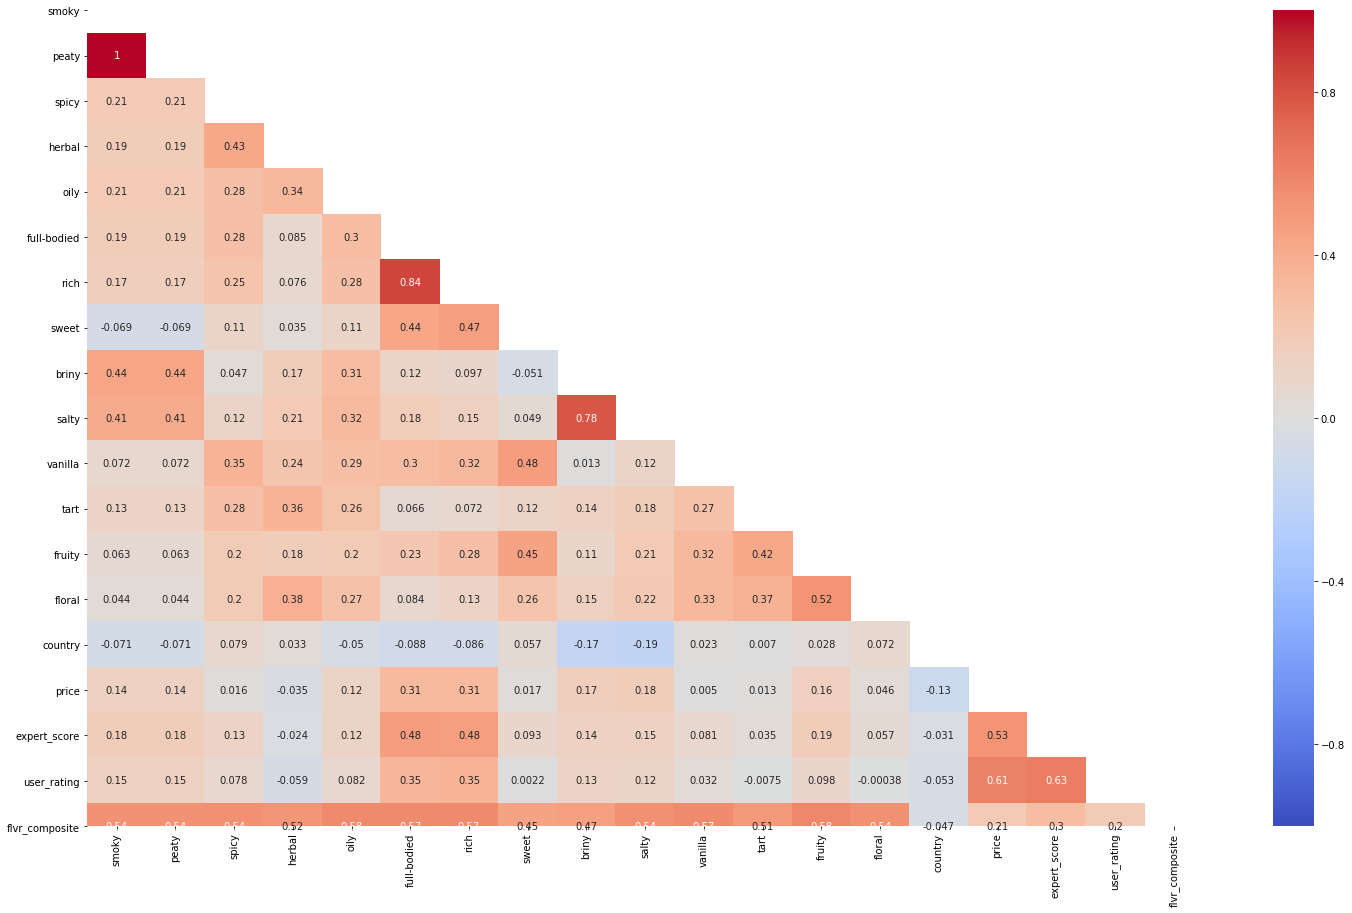

In [115]:
f, ax = plt.subplots(figsize=(25, 15))
matrix = np.triu(df_flavors.corr())
sns.heatmap(df_flavors.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)

### Plot correlation between variables ###

### Peaty & Smoky are perfectly correlated. Rich & full-bodied have strong correlation of 0.84 while Salty and Briny have a strong correlation of 0.78 - I choose to keep Smoky, Full-bodied & Salty 

# Baseline Models

In [116]:
df_flavors.columns


Index(['smoky', 'peaty', 'spicy', 'herbal', 'oily', 'full-bodied', 'rich',
       'sweet', 'briny', 'salty', 'vanilla', 'tart', 'fruity', 'floral',
       'country', 'price', 'expert_score', 'user_rating', 'flvr_composite'],
      dtype='object')

In [121]:
target_country = df_flavors['country']
target_price = df_flavors['price']
# target_expert_scr = df_flavors['expert_score']  if possible by convert into multi-class categorical variable
# target_user_rtg = df_flavors['user_rating'] if possible by convert into multi-class categorical variable

In [118]:
features = df.loc[:, ('smoky', 'peaty', 'spicy', 'herbal', 'oily', 'full-bodied', 'rich',
       'sweet', 'briny', 'salty', 'vanilla', 'tart', 'fruity', 'floral','flvr_composite')]

In [119]:
features

,smoky,peaty,spicy,herbal,oily,full-bodied,rich,sweet,briny,salty,vanilla,tart,fruity,floral,flvr_composite
0,30,30,50,30,20,80,80,85,0,15,20,25,85,50,nan
1,40,40,40,20,40,70,80,70,20,40,50,50,70,20,nan
2,40,40,65,50,20,60,60,45,0,0,60,60,45,0,nan
3,30,30,40,30,10,75,75,60,15,20,30,20,50,5,nan
4,50,50,60,0,15,90,100,50,0,0,20,20,80,10,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2657,35,35,20,0,0,40,55,85,0,0,25,10,10,0,nan
2658,0,0,40,20,0,30,0,100,0,0,100,0,60,10,nan
2659,90,90,10,10,40,10,10,90,0,0,50,20,30,10,nan
2660,0,0,10,100,80,0,0,40,0,0,20,0,0,0,nan


In [105]:
#sns.boxplot(x="features_preds", y="target_country", data=df_flavors)


In [88]:
# x = features_preds
# fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,10))
# plt.title('Graphs of Flavor Profiles')
# for n in range(1,15):
#     row = (n-1)//2
#     col = n%2-1
#     ax = axes[row]
#     y = target_country
#     ax.plot(x,y)
#     ax.set_title('x^{}'.format(n))

## Logistic Regression Baseline: All Features, Dependant Variable - Country 

In [89]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target_country, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (2129, 14) Target:  (2129,)
Test set - Features:  (533, 14) Target:  (533,)


In [90]:
from sklearn.model_selection import cross_val_score

In [91]:
evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Accuracy':[],
                           'Precision':[],
                           'FP':[],
                           'Recall':[],
                           'FN':[],
                           'F1-Score':[],
                           'AUC':[],
                           '5-Fold Cross Validation':[]})

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [93]:
# Fit the Logisitc Model
logreg1 = LogisticRegression().fit(X_train,y_train)
y_pred1 = logreg1.predict(X_test)

/Users/rajeevpanwar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rajeevpanwar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [98]:
from sklearn.metrics import classification_report 
labels = [0, 1]
cm = metrics.confusion_matrix(y_test, y_pred1, labels)
# print('True Positives: ' + str(cm[0,0]))
# print(cm[0,1])
# print(cm[1,0])
# print(cm[1,1])
print('Confusion Matrix :')
print(cm)
print('Test Accuracy Score :',metrics.accuracy_score(y_test, y_pred1))
#print('Train Accuracy Score :',metrics.accuracy_score(y_train, y_pred1))
print('Report : ')
print(classification_report(y_test, y_pred1))

Confusion Matrix :
[[135  54]
 [ 33 205]]
Test Accuracy Score : 0.6435272045028143
Report : 
              precision    recall  f1-score   support

           0       0.66      0.71      0.68       191
           1       0.64      0.85      0.73       242
           2       0.33      0.07      0.11        44
           3       0.00      0.00      0.00        36
           4       0.00      0.00      0.00        20

    accuracy                           0.64       533
   macro avg       0.33      0.32      0.31       533
weighted avg       0.56      0.64      0.59       533



## Model Evaluation Summary 

In [ ]:
# acc = float(format(metrics.accuracy_score(y_test, y_pred2, sample_weight=None), '.3f'))
# prec = float(format(metrics.precision_score(y_test_scaled, y_pred2),'.3f'))
# fp = cm[0,1]
# rec = float(format(metrics.recall_score(y_test_scaled, y_pred2),'.3f'))
# fn = cm[1,0]
# auc = float(format(metrics.roc_auc_score(y_test_scaled, y_pred2),'.3f'))
# f1 = float(format(metrics.f1_score(y_test_scaled, y_pred2),'.3f'))
# cv = cross_val_score(logreg2, df[scaled_features], df['default'], cv=5, scoring='roc_auc').mean()

# #print(acc, prec, fp, rec, fn, auc, f1, cv)
# r = evaluation.shape[0]
# evaluation.loc[r] = ['Logistic Regression-2','all features, scaled',acc,prec,fp,rec,fn,auc,f1,cv]
# evaluation.sort_values(by = 'AUC', ascending=False)

## Logistic Regression Baseline: All Features, Dependant Variable - Price

In [100]:
#improt train_test_split from sklearn package
from sklearn.model_selection import train_test_split

#call train_test_split on the data and capture the results
X_train, X_test, y_train, y_test = train_test_split(features, target_price, random_state=34,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (2129, 14) Target:  (2129,)
Test set - Features:  (533, 14) Target:  (533,)


In [101]:
logreg_p = LogisticRegression().fit(X_train,y_train)
y_pred_p = logreg_p.predict(X_test)

/Users/rajeevpanwar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/rajeevpanwar/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [102]:
from sklearn.metrics import classification_report 
labels = [0, 1]
cm = metrics.confusion_matrix(y_test, y_pred_p, labels)
# print('True Positives: ' + str(cm[0,0]))
# print(cm[0,1])
# print(cm[1,0])
# print(cm[1,1])
print('Confusion Matrix :')
print(cm)
print('Test Accuracy Score :',metrics.accuracy_score(y_test, y_pred_p))
#print('Train Accuracy Score :',metrics.accuracy_score(y_train, y_pred1))
print('Report : ')
print(classification_report(y_test, y_pred_p))

Confusion Matrix :
[[0 0]
 [0 0]]
Test Accuracy Score : 0.399624765478424
Report : 
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        37
           2       0.44      0.80      0.57       192
           3       0.32      0.24      0.27       138
           4       0.29      0.19      0.23        98
           5       0.44      0.12      0.19        68

    accuracy                           0.40       533
   macro avg       0.30      0.27      0.25       533
weighted avg       0.35      0.40      0.34       533



/Users/rajeevpanwar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
